In [1]:
import pandas as pd
import seaborn as sns

from sklearn import datasets

#helper utility functions allows us to generate artificial dataset of diff types
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [8]:
#generates 2000 datapoints which make up the swiss_roll(manifold)
X, color = datasets.make_swiss_roll(n_samples = 2000)

#dataset has 3 dimensions,3 co-ordinates to express data points
print('shape of x : ', X.shape)

#points close to one another will have similar color
print('shape of color : ', color.shape)

shape of x :  (2000, 3)
shape of color :  (2000,)


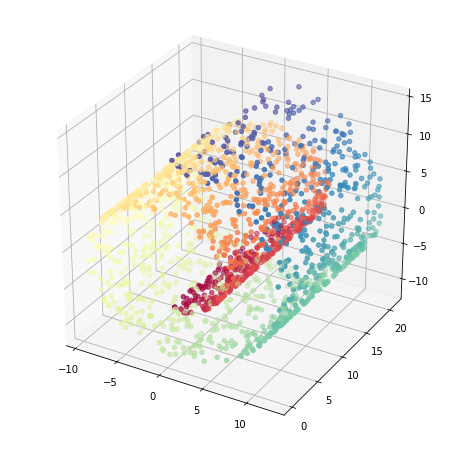

In [7]:
#visualize data points
X = pd.DataFrame(X)

ax = plt.subplots(figsize=(8, 8))
ax = plt.axes(projection='3d')

ax.scatter3D(X[0], X[1], X[2], c=color, cmap = plt.cm.Spectral)

In [9]:
#to reduce dimensionality
def apply_manifold_learning(X, method):
    
    #convert original data points to 2d
    X = method.fit_transform(X)
    
    #print shape of new data which will have reduced dimensionality
    print('New shape of X : ', X.shape)
    
    X = pd.DataFrame(X)
    
    plt.subplots(figsize=(8, 8))
    plt.axis('equal');
    
    #plot reduced dimensionality in 2d 
    plt.scatter(X[0], X[1], c=color, cmap=plt.cm.Spectral)
    plt.xlabel('X[0]')
    plt.ylabel('X[1]')
    
    return method

New shape of X :  (2000, 2)


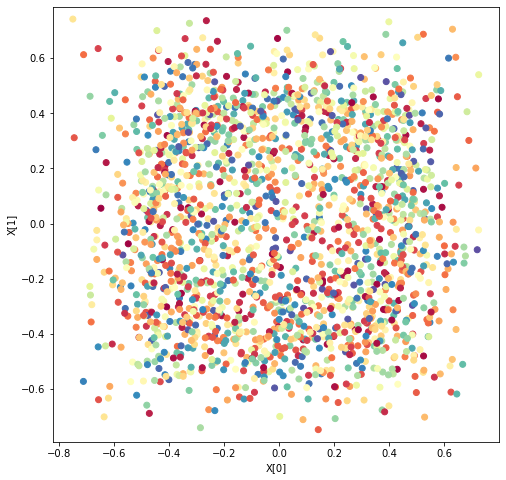

In [10]:
from sklearn.manifold import MDS

#reduces dimensionality while trying to preserve distance between instances
#expressed in 2d hence n_components = 2
#nonmetric version hence metric false
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = False))

New shape of X :  (2000, 2)


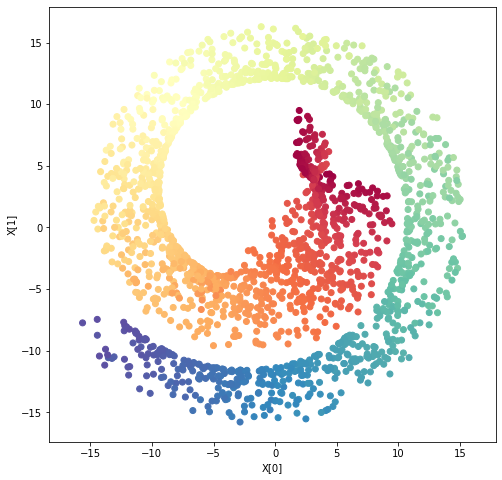

In [11]:
#metric true
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = True))

New shape of X :  (2000, 2)


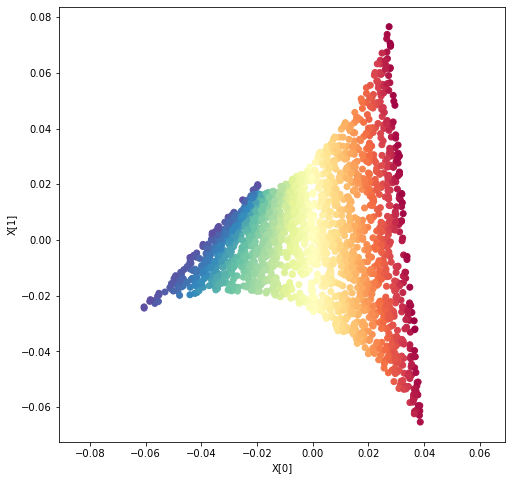

In [12]:
#measures how each instance relates to its closest neighbors
#finds a lower dimensionality representation
#preserves local relationships
from sklearn.manifold import LocallyLinearEmbedding

#reduce 3d data to 2d
#use 15 neighbors in nearest neighbors algorithm
#standard flavour o LLE
lle = apply_manifold_learning(X, LocallyLinearEmbedding(n_neighbors = 15,
                                                       n_components = 2,
                                                       method = 'standard')) 

New shape of X :  (2000, 2)


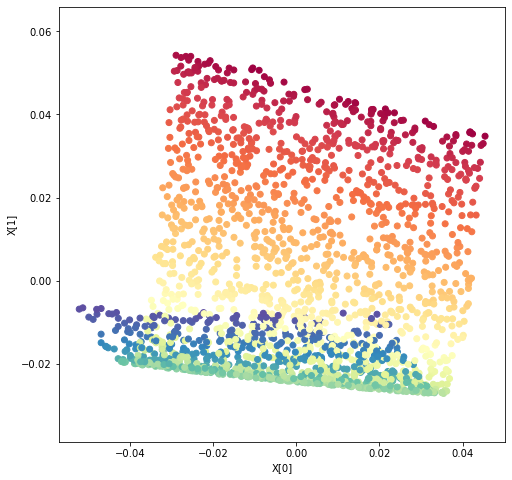

In [18]:
#hessian technique of LLE
lle = apply_manifold_learning(X, LocallyLinearEmbedding(n_neighbors = 15,
                                                       n_components = 2,
                                                       method = 'hessian')) 